In [1]:
import numpy as np

#Ques-1:

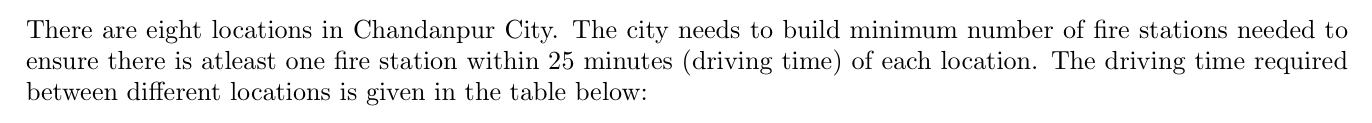

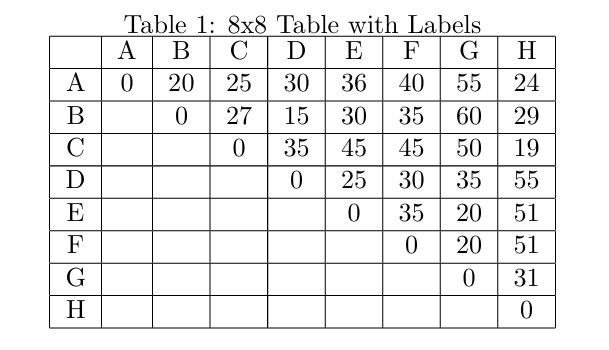

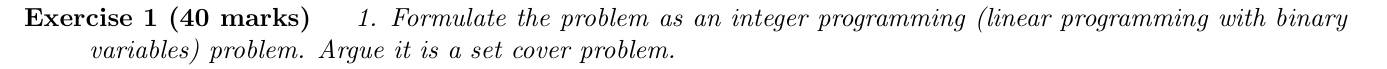

Let us start with defining our variables our cities I represent as numbers in i from 1 to 8,let our variable $y_i$ be:

$y_i \begin{cases}
1 & \text{if $i^{th}$ city is choosen} \\
0 & \text{otherwise}
\end{cases}
$

Since, if we choose the city $i$ then we can cover a city less than 25 kms of distance, hence we define a concept of $\textbf{neighbourhood}$ in this, we say that city $j$ is in neighbourhood of city $i$ if distance between city $j$ and city $i$ is less than 25kms. Hence, neighbourhoods for each city is given below:



$$
\begin{array}{cccccccc}
~ & A  & B  & C  & D  & E  & F  & G  & H  \\
A & 0  & 20 & 25 & 30 & 36 & 40 & 55 & 24 \\
B & 20 & 0  & 27 & 15 & 30 & 35 & 60 & 29 \\
C & 25 & 27 & 0  & 35 & 45 & 45 & 50 & 19 \\
D & 30 & 15 & 35 & 0  & 25 & 30 & 35 & 55 \\
E & 36 & 30 & 45 & 25 & 0  & 35 & 20 & 51 \\
F & 40 & 35 & 45 & 30 & 35 & 0  & 20 & 51 \\
G & 55 & 60 & 50 & 35 & 20 & 20 & 0  & 31 \\
H & 24 & 29 & 19 & 55 & 51 & 51 & 31 & 0  
\end{array}
$$

Neighbours for each city:

$A : \{B, C, H\} \\
B : \{A, D\} \\
C : \{A, H\}\\
D : \{B, E\} \\
E : \{D, G\} \\
F : \{G\}\\
G : \{E, F,\} \\
H : \{A, C\}$

we can change our matrix using $a_{ij}$ which is given below.

Let us represent a varible $a_{ij}$ as:
$a_{ij} \begin{cases} 1 & \text{if i is in neigbourhood of j} \\
0 & \text{otherwise} \end{cases}$

**LPP:**

Then our integer program will become:

Objective: $$ \min \sum_{i=1}^{8}y_i $$
Such that : $$ \sum_{j = 1}^{8}a_{ij}y_j \geq 1 \ \ \ ∀ \ i = 1,2,...8$$

The objective is to choose as minimum cities as possible, such that for each city i is covered atleast once. This is ensured as, for each $y_j$ either $i$ itself is choosen or a neighbour of $i$, ( say, $j$ ) is choosen.

**Binary Decision Variables:**
$$ y_i \in \{0,1\}, \quad \forall i=1,2,...,n $$

This problem is indeed a set cover problem because, when we constraint on $\sum_{j = 1}^{8}a_{ij}y_j$, this takes the node $i$ and constraints that atleast one set is chosen where the node $i$ is present. For ex: for $i =1$

$$
 a_{11}y_1 + a_{12}y_2 + a_{13}y_3 + a_{14}y_4 + a_{15}y_5+ a_{16}y_6 + a_{17}y_7 + a_{18}y_8  \geq 1
$$
$$
 y_1 + y_2 + y_3 + y_8  \geq 1
$$

which shows, that either 1 is selected or its neigbours 2, 3, 8 are chosen, which will cover the node 1.

In [2]:
!pip install -q pyomo
#Below snip of code install the GLPK solver into current python session
!apt-get install -y -qq glpk-utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.8 MB/s eta 0:00:00
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 121753 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected pac

In [3]:
from pyomo.environ import*

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np

In [5]:
#distance matrix
D =[[0 , 20, 25, 30, 36, 40, 55, 24],
    [20, 0 , 27, 15, 30, 35, 60, 29],
    [25, 27, 0 , 35, 45, 45, 50, 19],
    [30, 15, 35, 0 , 25, 30, 35, 55],
    [36, 30, 45, 25, 0 , 35, 20, 51],
    [40, 35, 45, 30, 35, 0 , 20, 51],
    [55, 60, 50, 35, 20, 20, 0 , 31],
    [24, 29, 19, 55, 51, 51, 31, 0]]
A = [[1,1,1,0,0,0,0,1],
    [1,1,0,1,0,0,0,0],
    [1,0,1,0,0,0,0,1],
    [0,1,0,1,1,0,0,0],
    [0,0,0,1,1,0,1,0],
    [0,0,0,0,0,0,1,1],
    [0,0,0,0,1,1,1,0],
    [1,0,1,0,0,0,0,1]]

In [6]:
model = ConcreteModel()
model.y = Var(range(8), domain = Binary)
model.objective = Objective(expr = sum(model.y[i] for i in range(8)), sense = minimize)

model.constraints = ConstraintList()

for i in range(8):
  model.constraints.add(expr = sum(A[i][j]*model.y[j] for j in range(8)) >= 1)

result = SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model)

In [7]:
model.pprint()



1 Var Declarations
    y : Size=8, Index={0, 1, 2, 3, 4, 5, 6, 7}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :   1.0 :     1 : False : False : Binary
          1 :     0 :   1.0 :     1 : False : False : Binary
          2 :     0 :   0.0 :     1 : False : False : Binary
          3 :     0 :   0.0 :     1 : False : False : Binary
          4 :     0 :   0.0 :     1 : False : False : Binary
          5 :     0 :   0.0 :     1 : False : False : Binary
          6 :     0 :   1.0 :     1 : False : False : Binary
          7 :     0 :   0.0 :     1 : False : False : Binary

1 Objective Declarations
    objective : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : y[0] + y[1] + y[2] + y[3] + y[4] + y[5] + y[6] + y[7]

1 Constraint Declarations
    constraints : Size=8, Index={1, 2, 3, 4, 5, 6, 7, 8}, Active=True
        Key : Lower : Body                                                     

In [8]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()
# display solution
print('Objective Value: ',model.objective())
print('\nDecision Variables')
for i in range(8):
  print(f'y{i} = { model.y[i]()}')

print('\nConstraints')
for i in range(1,9):
  print(f'Constraint {i} =  {model.constraints[i]()}')


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 3.0
  Upper bound: 3.0
  Number of objectives: 1
  Number of constraints: 8
  Number of variables: 8
  Number of nonzeros: 24
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 3
      Number of created subproblems: 3
  Error rc: 0
  Time: 0.00594782829284668
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------

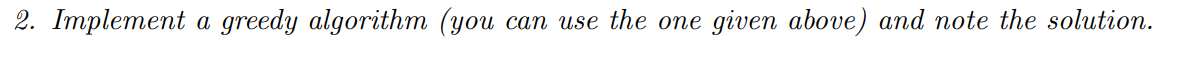

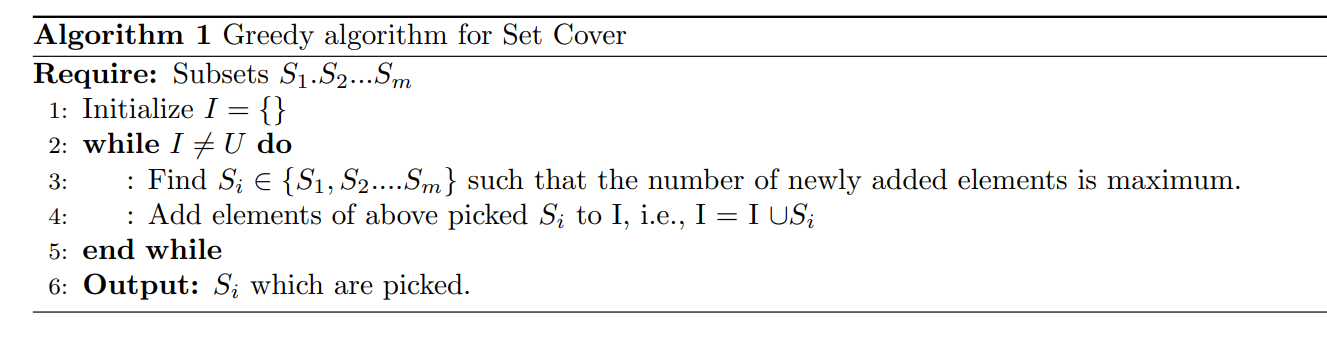

##Creating sets of location:

By just observing given matrix:

In [11]:
U={'A','B','C','D','E','F','G','H'}
s1={'A','B','C','H'}
s2={'B','D','A'}
s3={'C','H','A'}
s4={'D','E','B'}
s5={'D','G','E'}
s6={'F','G'}
s7={'E','F','G'}
s8={'H','A','C'}
S=[s1,s2,s3,s4,s5,s6,s7,s8]

In [12]:
driving_station= [[0,20,25,30,36,40,55,24],
          [20,0,27,15,30,35,60,29],
          [25,27,0,35,45,45,50,19],
          [30,15,35,0,25,30,35,55],
          [36,30,45,25,0,35,20,51],
          [40,35,45,30,35,0,20,51],
          [55,60,50,35,20,20,0,31],
          [24,29,19,55,51,51,31,0]]


Obtaing from code:

In [13]:
for i in range(len(driving_station)):
  for j in range(len(driving_station)):
    if driving_station[i][j]>25:
      driving_station[i][j]=-1
    else :
      pass
station_time=np.copy(driving_station)
station=(driving_station)
station
for i in range(len(station)):
  for j in range(len(station)):
    if station[i][j]!=-1:
      if j==0:
        station[i][j]="A"
      if j==1:
        station[i][j]="B"
      if j==2:
        station[i][j]="C"
      if j==3:
        station[i][j]="D"
      if j==4:
        station[i][j]="E"
      if j==5:
        station[i][j]="F"
      if j==6:
        station[i][j]="G"
      if j==7:
        station[i][j]="H"
for i in range(len(station)):
  station[i].remove(-1)
for i in range(len(station)):
  station[i]=set(station[i])
station
for i in range(len(station)):
      station[i].remove(-1)

In [14]:
station

[{'A', 'B', 'C', 'H'},
 {'A', 'B', 'D'},
 {'A', 'C', 'H'},
 {'B', 'D', 'E'},
 {'D', 'E', 'G'},
 {'F', 'G'},
 {'E', 'F', 'G'},
 {'A', 'C', 'H'}]

In [15]:
U={'A','B','C','D','E','F','G','H'}
# s1={'A','B','C','H'}
# s2={'B','D','A'}
# s3={'C','H','A'}
# s4={'D','E','B'}
# s5={'D','G','E'}
# s6={'F','G'}
# s7={'E','F','G'}
# s8={'H','A','C'}
# S=[s1,s2,s3,s4,s5,s6,s7,s8]

In [16]:
def greedy_set_cover(U,S):
    #universe = set().union(*S)


    I = set()
    set_to_select=set()  # Initialize the I set
    while I != U:  # While I is not equal to the universal set
        max_new_elements = -1
        selected_subset = set({})
        for subset in S:
            new_elements = len(subset - I)  # Calculate newly added elements
            if new_elements > max_new_elements:
                max_new_elements = new_elements
                selected_subset = subset
        I.update(selected_subset)
        set_to_select.add(frozenset(selected_subset)) # Add elements  to be selected
    sel=[set(s) for s in set_to_select]
    return I,(sel)



Union_of_selected_set,selected_sets = greedy_set_cover(U,station)
print("Selected sets:", selected_sets)


Selected sets: [{'G', 'D', 'E'}, {'H', 'B', 'A', 'C'}, {'G', 'F'}]


##Set cover:
Above given problem can be considered as the set cover problem like we can take universe as the collection of all the locations and collection of subsets will be corrosponding to each location such that for the ith location the set will be all the locations that lie within 25 minutes of the distance from that location
We will find that collecttion of subsets (containing sets coorosponding to each location) and collection of all location to our greedy algorithm And algorithm will give all those subsets that unites to form the collection and total number of such subsets is the minimum number of fire stations needed to be installed at particular locations

###Solution:
We need minimum three sets(station)  to satisfy the given constrained
the location are:S1,S5,S6

So, the corresponsing location  are A,F,E

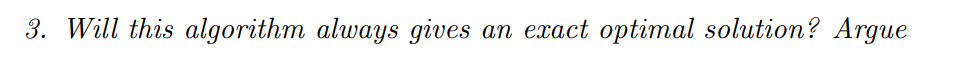

The greedy algorithm for set cover does not always guarantee an exact solution. While it often produces a reasonably good approximation of the optimal solution, it can fail to find the exact minimum set cover in some cases.

The greedy algorithm iteratively selects the subset that covers the maximum number of elements not already covered. However, this local greedy decision might not always lead to the globally optimal solution. There can be cases where the locally optimal choice leads to a suboptimal solution overall.

In general, the greedy algorithm for set cover is known to have an approximation ratio of ln(n), where n is the number of elements in the universe. This means that the size of the solution produced by the greedy algorithm is at most ln(n) times the size of the optimal solution.
While the greedy algorithm is efficient and easy to implement

###Advantages:
The greedy algorithm is simple and easy to implement.
It runs in polynomial time, with a time complexity of O(nm), where n is the number of elements in U and m is the number of sets in S.
The approximation factor of ln(n) is a proven guarantee, so we know that the solution is at most ln(n) times larger than the optimal solution.

###Disadvantages:
The greedy algorithm may not always find the optimal solution, so it is only an approximation algorithm.
The greedy algorithm relies heavily on the initial ordering of the sets, which can affect the quality of the solution.
The approximation factor of ln(n) can still be large, especially for small values of n.

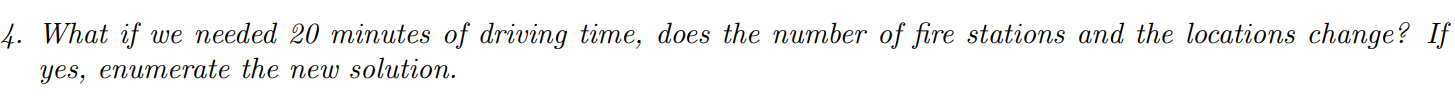

###Changing driving time to 20 min:

In [17]:
driving_station= [[0,20,25,30,36,40,55,24],
          [20,0,27,15,30,35,60,29],
          [25,27,0,35,45,45,50,19],
          [30,15,35,0,25,30,35,55],
          [36,30,45,25,0,35,20,51],
          [40,35,45,30,35,0,20,51],
          [55,60,50,35,20,20,0,31],
          [24,29,19,55,51,51,31,0]]

for i in range(len(driving_station)):
  for j in range(len(driving_station)):
    if driving_station[i][j]>20:
      driving_station[i][j]=-1
    else :
      pass
station_time=np.copy(driving_station)
station=(driving_station)
station
for i in range(len(station)):
  for j in range(len(station)):
    if station[i][j]!=-1:
      if j==0:
        station[i][j]="A"
      if j==1:
        station[i][j]="B"
      if j==2:
        station[i][j]="C"
      if j==3:
        station[i][j]="D"
      if j==4:
        station[i][j]="E"
      if j==5:
        station[i][j]="F"
      if j==6:
        station[i][j]="G"
      if j==7:
        station[i][j]="H"
for i in range(len(station)):
  station[i].remove(-1)
for i in range(len(station)):
  station[i]=set(station[i])
station
for i in range(len(station)):
      station[i].remove(-1)

In [18]:
station

[{'A', 'B'},
 {'A', 'B', 'D'},
 {'C', 'H'},
 {'B', 'D'},
 {'E', 'G'},
 {'F', 'G'},
 {'E', 'F', 'G'},
 {'C', 'H'}]

In [19]:
solution=greedy_set_cover(U,station)
solution

({'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'},
 [{'E', 'F', 'G'}, {'C', 'H'}, {'A', 'B', 'D'}])

Yes, The location of station changes but the number of station required is same as previous

###Updated location:

The new location are B,C,G that is new station are sets S2,S7,S8.


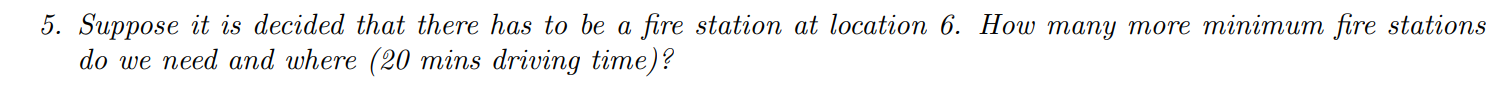

In [20]:
def greedy_set_cover(U,S):
    #universe = set().union(*S)


    I = set('G') # given that G has to be fire station
    set_to_select=set()  # Initialize the I set
    while I != U:  # While I is not equal to the universal set
        max_new_elements = -1
        selected_subset = set({})
        for subset in S:
            new_elements = len(subset - I)  # Calculate newly added elements
            if new_elements > max_new_elements:
                max_new_elements = new_elements
                selected_subset = subset
        I.update(selected_subset)
        set_to_select.add(frozenset(selected_subset)) # Add elements  to be selected
    sel=[set(s) for s in set_to_select]
    return I,(sel)



Union_of_selected_set,selected_sets = greedy_set_cover(U,station)
print("Selected sets:", selected_sets)
print('Location set have Fire Station:',Union_of_selected_set)

Selected sets: [{'G', 'F', 'E'}, {'C', 'H'}, {'B', 'D', 'A'}]
Location set: {'B', 'F', 'C', 'G', 'D', 'E', 'H', 'A'}


The result changes but number of new sets remain same as they are 3 in number  in this case also.

###Station Installed New Location:
New station are = B,C,H
and their is no more station than 3 if we take 6 as F then we observed changes and getting four station.